In [1]:
#import required libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
#import dataset from CSV into dataframe
df  = pd.read_csv("https://github.com/mpourhoma/CS4661/raw/master/Heart_short.csv")

#displaying dataframe
df

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No
...,...,...,...,...,...,...,...
276,45,110,264,0,132,1.2,Yes
277,68,144,193,0,141,3.4,Yes
278,57,130,131,0,115,1.2,Yes
279,57,130,236,2,174,0.0,Yes


In [3]:
#creating a list of feature names from dataset
feature_cols = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']

#using above list to select features from dataset
X = df[feature_cols]

#creating label vector from original dataset
y = df['AHD']

#displaying first 5 rows of feature matrix and label vector
print(X.head())
print(y.head())

   Age  RestBP  Chol  RestECG  MaxHR  Oldpeak
0   63     145   233        2    150      2.3
1   67     160   286        2    108      1.5
2   67     120   229        2    129      2.6
3   37     130   250        0    187      3.5
4   41     130   204        2    172      1.4
0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object


In [4]:
#normalizing data
scale_X = preprocessing.scale(X)
scale_X

array([[ 0.94788279,  0.74978425, -0.25859799,  1.04743633, -0.00919313,
         1.13182982],
       [ 1.38542704,  1.59842565,  0.75330422,  1.04743633, -1.84813139,
         0.43550978],
       [ 1.38542704, -0.6646181 , -0.33496796,  1.04743633, -0.92866226,
         1.39294984],
       ...,
       [ 0.29156641, -0.09885716, -2.20603242, -0.96851989, -1.54164168,
         0.17438976],
       [ 0.29156641, -0.09885716, -0.2013205 ,  1.04743633,  1.04162873,
        -0.8700903 ],
       [-1.78676878,  0.35375159, -1.36596267, -0.96851989,  0.99784448,
        -0.8700903 ]])

In [5]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(scale_X, y, test_size = 0.25, random_state = 3)

In [6]:
#instantiated object of LogisticRegression
LR = LogisticRegression()

#fit data to LR
LR.fit(scale_X,y)

#trainig LR on training set
LR.fit(X_train, y_train)

#testing LR on testing set
y_predict_LR = LR.predict(X_test)

#compaing predicted labels with acutal labels for accuracy score
Heart_Disease_Accuracy = accuracy_score(y_test, y_predict_LR)
print(Heart_Disease_Accuracy)

0.7183098591549296


In [7]:
#import libraries for ROC
import matplotlib.pyplot as plt

#import for AUC
from sklearn import metrics

In [8]:
# Predicting the Binary Label:
y_predict_LR = LR.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_LR = LR.predict_proba(X_test)


In [9]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict_LR)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob_LR)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob_LR[:,1])

253     No
74     Yes
230     No
38     Yes
16     Yes
      ... 
15      No
78      No
109     No
122     No
142     No
Name: AHD, Length: 71, dtype: object
['Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes'
 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No'
 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No']
[[0.49847189 0.50152811]
 [0.55153223 0.44846777]
 [0.39514152 0.60485848]
 [0.39636475 0.60363525]
 [0.8463285  0.1536715 ]
 [0.77042084 0.22957916]
 [0.73485372 0.26514628]
 [0.86548609 0.13451391]
 [0.35529864 0.64470136]
 [0.6707959  0.3292041 ]
 [0.09558374 0.90441626]
 [0.91924811 0.08075189]
 [0.29096442 0.70903558]
 [0.43043601 0.56956399]
 [0.66808153 0.33191847]
 [0.85924791 0.14075209]
 [0.11598482 0.88401518]
 [0.68324451 0.31675549]
 [0.

In [10]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_LR[:,1], pos_label='Yes')

print(fpr)
print(tpr)

[0.         0.         0.02439024 0.02439024 0.04878049 0.04878049
 0.09756098 0.09756098 0.12195122 0.12195122 0.14634146 0.14634146
 0.2195122  0.2195122  0.29268293 0.29268293 0.3902439  0.3902439
 0.41463415 0.41463415 0.46341463 0.46341463 0.56097561 0.56097561
 0.68292683 0.68292683 0.70731707 0.70731707 0.73170732 0.73170732
 1.        ]
[0.         0.03333333 0.03333333 0.33333333 0.33333333 0.36666667
 0.36666667 0.4        0.4        0.53333333 0.53333333 0.6
 0.6        0.63333333 0.63333333 0.7        0.7        0.73333333
 0.73333333 0.76666667 0.76666667 0.83333333 0.83333333 0.86666667
 0.86666667 0.93333333 0.93333333 0.96666667 0.96666667 1.
 1.        ]


In [11]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.7650406504065042


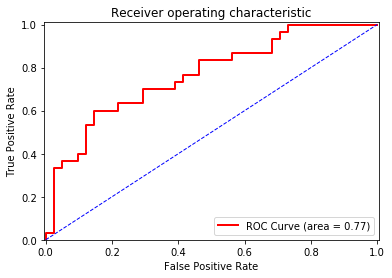

In [12]:
# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

#ROC curve
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC Curve (area = %0.2f)' % AUC)

#Random Guess Line:
plt.plot([0, 1], [0, 1], color = 'blue', lw = 1, linestyle = '--')

#Defining The Range of X-Axis and Y-Axis
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

#Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = "lower right")

plt.show()